#**Load Data**

In [10]:
from google.colab import files
uploaded = files.upload()

Saving Clean15YearChennaiWeather.csv to Clean15YearChennaiWeather.csv


In [11]:
import pandas as pd
df = pd.read_csv('Clean15YearChennaiWeather.csv')
print(df.head())

                                 date       date_id  wind  \
0  Sunday 14 July 2024, 18.00 — 00.00  1.720980e+12   9.0   
1  Monday 15 July 2024, 00.00 — 06.00  1.721002e+12  14.0   
2  Monday 15 July 2024, 06.00 — 12.00  1.721023e+12  17.0   
3  Monday 15 July 2024, 12.00 — 18.00  1.721045e+12  13.0   
4  Monday 15 July 2024, 18.00 — 00.00  1.721066e+12  19.0   

                      desc  temp    baro  hum         day  month  day_date  \
0            Drizzle. Fog.  30.0  1003.0   82  2024-07-14      7        14   
1                     Fog.  29.0  1002.0   80  2024-07-15      7        15   
2  Drizzle. Broken clouds.  29.0  1003.0   82  2024-07-15      7        15   
3  Drizzle. Broken clouds.  29.0  1001.0   85  2024-07-15      7        15   
4                     Fog.  29.0  1002.0   84  2024-07-15      7        15   

   year  day_name Start_hour End_hour  
0  2024         6      18:00    00:00  
1  2024         0      00:00    06:00  
2  2024         0      06:00    12:00  
3  2

#**Data Preprocessing**

## Date Formatting

In [33]:
# Convert the 'day' column to datetime
df['day'] = pd.to_datetime(df['day'], errors='coerce')

In [34]:
print(df['day'])

0      2024-07-14
1      2024-07-15
2      2024-07-15
3      2024-07-15
4      2024-07-15
          ...    
1063   2010-01-30
1064   2010-01-31
1065   2010-01-31
1066   2010-01-31
1067   2010-01-31
Name: day, Length: 1068, dtype: datetime64[ns]


In [14]:
# Extract features from the 'day' column
df['year'] = df['day'].dt.year
df['month'] = df['day'].dt.month
df['day_of_month'] = df['day'].dt.day
df['day_of_week'] = df['day'].dt.dayofweek  # 0 = Monday, 6 = Sunday

In [35]:
print(df['year'])
print(df['month'])
print(df['day_of_month'])
print(df['day_of_week'])

0       2024
1       2024
2       2024
3       2024
4       2024
        ... 
1063    2010
1064    2010
1065    2010
1066    2010
1067    2010
Name: year, Length: 1068, dtype: int32
0       7
1       7
2       7
3       7
4       7
       ..
1063    1
1064    1
1065    1
1066    1
1067    1
Name: month, Length: 1068, dtype: int32
0       14
1       15
2       15
3       15
4       15
        ..
1063    30
1064    31
1065    31
1066    31
1067    31
Name: day_of_month, Length: 1068, dtype: int32
0       6
1       0
2       0
3       0
4       0
       ..
1063    5
1064    6
1065    6
1066    6
1067    6
Name: day_of_week, Length: 1068, dtype: int32


##Missing value

In [36]:
# Check for missing values
print(df.isnull().sum())

date_id          0
wind             0
desc             0
temp            30
baro             0
hum              0
day              0
month            0
day_date         0
year             0
day_name         0
Start_hour       0
End_hour         0
day_of_month     0
day_of_week      0
dtype: int64


In [37]:
# Drop rows where 'temp' has missing values
df = df.dropna(subset=['temp'])

In [38]:
print(df.isnull().sum())

date_id         0
wind            0
desc            0
temp            0
baro            0
hum             0
day             0
month           0
day_date        0
year            0
day_name        0
Start_hour      0
End_hour        0
day_of_month    0
day_of_week     0
dtype: int64


## Drop Unnecessary column

In [17]:
df.drop(columns=['date'], inplace=True)

In [39]:
print(df.head())

        date_id  wind                     desc  temp    baro  hum        day  \
0  1.720980e+12   9.0            Drizzle. Fog.  30.0  1003.0   82 2024-07-14   
1  1.721002e+12  14.0                     Fog.  29.0  1002.0   80 2024-07-15   
2  1.721023e+12  17.0  Drizzle. Broken clouds.  29.0  1003.0   82 2024-07-15   
3  1.721045e+12  13.0  Drizzle. Broken clouds.  29.0  1001.0   85 2024-07-15   
4  1.721066e+12  19.0                     Fog.  29.0  1002.0   84 2024-07-15   

   month  day_date  year  day_name Start_hour End_hour  day_of_month  \
0      7        14  2024         6      18:00    00:00            14   
1      7        15  2024         0      00:00    06:00            15   
2      7        15  2024         0      06:00    12:00            15   
3      7        15  2024         0      12:00    18:00            15   
4      7        15  2024         0      18:00    00:00            15   

   day_of_week  
0            6  
1            0  
2            0  
3            0  
4

# **Data Splitting**

## Features and target value

In [19]:
from sklearn.model_selection import train_test_split

In [40]:
X = df[['wind', 'temp', 'baro', 'day_of_week','year','month']]  #feature columns
Y = df['hum']  #target column

In [22]:
print(X)

      wind  temp    baro  day_of_week  year  month
0      9.0  30.0  1003.0            6  2024      7
1     14.0  29.0  1002.0            0  2024      7
2     17.0  29.0  1003.0            0  2024      7
3     13.0  29.0  1001.0            0  2024      7
4     19.0  29.0  1002.0            0  2024      7
...    ...   ...     ...          ...   ...    ...
1063  10.0  26.0  1016.0            5  2010      1
1064   0.0  23.0  1015.0            6  2010      1
1065   7.0  29.0  1017.0            6  2010      1
1066  16.0  29.0  1014.0            6  2010      1
1067   7.0  26.0  1016.0            6  2010      1

[1068 rows x 6 columns]


In [23]:
print(Y)

0       82
1       80
2       82
3       85
4       84
        ..
1063    76
1064    91
1065    75
1066    55
1067    76
Name: hum, Length: 1068, dtype: int64


## Train and Test data split

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [42]:
print(X_train)

     wind  temp    baro  day_of_week  year  month
980   5.0  23.0  1012.0            6  2010      1
405  20.0  35.0  1002.0            2  2024      7
515   2.0  30.0   672.0            1  2009      9
411  16.0  30.0  1003.0            4  2024      7
494  12.0  37.0  1005.0            3  2009      9
..    ...   ...     ...          ...   ...    ...
87   17.0  32.0  1004.0            6  2024      7
330  14.0  31.0  1003.0            6  2024      7
466  20.0  35.0  1002.0            2  2024      7
121  15.0  32.0  1001.0            0  2024      7
890  12.0  28.0  1013.0            4  2009     12

[830 rows x 6 columns]


In [26]:
print(Y_train)

910     73
944     96
567     66
106     75
587      0
        ..
330     72
466     57
121     75
1044    91
860     91
Name: hum, Length: 854, dtype: int64


In [43]:
print(X_test)

      wind  temp    baro  day_of_week  year  month
199   18.0  28.0  1003.0            3  2024      7
947    6.0  26.0  1014.0            4  2010      1
537    3.0  33.0  1010.0            0  2009      9
210   20.0  35.0  1002.0            6  2024      7
305    9.0  30.0  1003.0            6  2024      7
...    ...   ...     ...          ...   ...    ...
1065   7.0  29.0  1017.0            6  2010      1
644    0.0  27.0  1009.0            6  2009     10
646   11.0  35.0  1008.0            6  2009     10
409   19.0  36.0  1001.0            3  2024      7
898   20.0  29.0  1015.0            6  2009     12

[208 rows x 6 columns]


In [28]:
print(Y_test)

707    90
215    66
881    95
88     62
784    94
       ..
450    65
601    59
649    67
581    59
277    70
Name: hum, Length: 214, dtype: int64


In [30]:
print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)

Training set shape: (854, 6) (854,)
Testing set shape: (214, 6) (214,)


# **Model Fitting**

## *Linear Regression*

### Model Training



In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [6]:
# Initialize the Linear Regression model
linear_model = LinearRegression()

In [44]:
linear_model.fit(X_train, Y_train)

LinearRegression()

### Prediction

In [45]:
Y_lr_pred = linear_model.predict(X_test)

In [46]:
print(Y_lr_pred)

[ 81.48818272  83.39636295  71.00788716  59.72061641  81.17924707
  80.59190596  97.06056207  64.15521932  91.36260436  81.48818272
  61.76562127  91.5574209   79.83030323  61.77666611  80.5553558
  64.57497541  69.55130685  84.56895209  69.02342439  61.39981747
  58.2255359   57.3587867   70.05899809  63.94777247  88.32006992
  71.21851053  79.83030323  93.28400988  85.86132686  63.94777247
  81.48818272  81.87409233  99.6541175   80.52887386  74.91794017
  70.52935893  66.73169223  79.19665353  92.55786172  59.12229039
  63.95517178  69.02342439  70.9950493   72.48816906  59.28701425
  89.19488206  84.93987227  68.87684688  87.50095302  71.69467965
  85.99847319  81.09365804  74.21494249  83.41295556 101.58974436
  80.55645139  58.02784747  79.01899473  79.75878695  58.77250098
  50.79435798  57.50569146  71.21851053  55.79913211  78.03858353
  74.96828171  95.48720349  65.67249777  69.66792812  94.85679022
  65.67249777  55.64381983  72.57090908  59.72061641  66.75962877
  78.237344

##

### Evaluation

In [47]:
mae = mean_absolute_error(Y_test, Y_lr_pred)
mse = mean_squared_error(Y_test, Y_lr_pred)
r2 = r2_score(Y_test, Y_lr_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Absolute Error (MAE): 4.350693340842396
Mean Squared Error (MSE): 30.221585244087787
R² Score: 0.7957454878338018


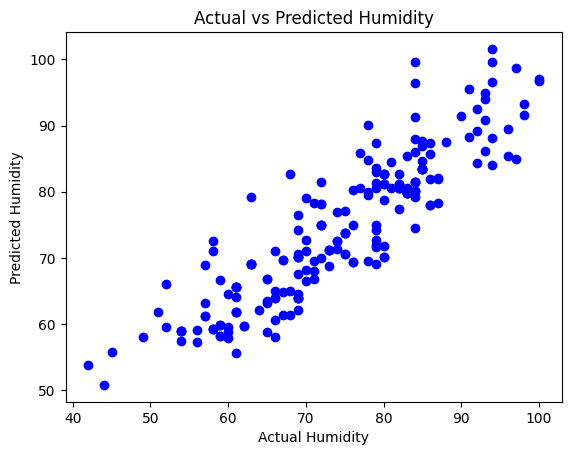

In [49]:
import matplotlib.pyplot as plt

plt.scatter(Y_test, Y_lr_pred, color='blue')
plt.xlabel("Actual Humidity")
plt.ylabel("Predicted Humidity")
plt.title("Actual vs Predicted Humidity")
plt.show()

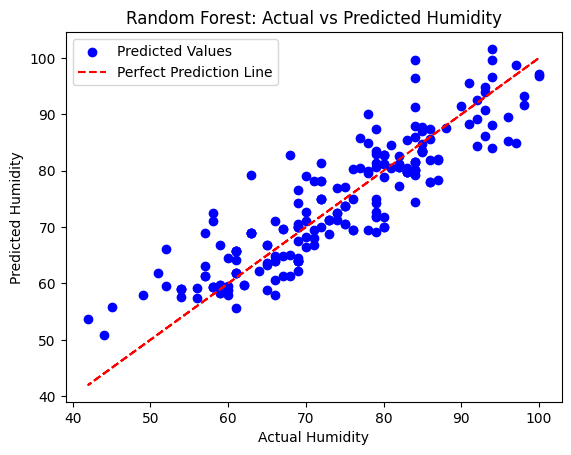

In [81]:
plt.scatter(Y_test, Y_lr_pred, color='blue', label="Predicted Values")
plt.plot(Y_test, Y_test, color='red', linestyle="--", label="Perfect Prediction Line")
plt.xlabel("Actual Humidity")
plt.ylabel("Predicted Humidity")
plt.title("Random Forest: Actual vs Predicted Humidity")
plt.legend()
plt.show()

In [84]:
accuracy = r2 * 100
print(f"Approximate Accuracy (R²): {accuracy:.2f}%")

Approximate Accuracy (R²): 79.57%


## *Decision Tree Regression*

### Model Training

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [55]:
dt_regressor = DecisionTreeRegressor(random_state=42)

dt_regressor.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

### Prediction

In [56]:
Y_dtr_pred = dt_regressor.predict(X_test)

In [57]:
print(Y_dtr_pred)

[ 84.  85.  71.  62.  82.  85. 100.  61.  81.  84.  61.  91.  83.  47.
  82.  72.  79.  86.  63.  62.  59.  56.  80.  66.  91.  73.  83.  93.
  90.  66.  84.  89.  93.  79.  72.  75.  54.  84.  97.  40.  69.  63.
  74.  75.  58.  89.  89.  72.  93.  79.  86.  80.  68.  85.  94.  81.
  55.  76.  87.  64.  46.  53.  73.  51.  88.  66.  93.  61.  67.  97.
  61.  60.  74.  62.  71.  76.  91.  85.  81.  71.  93.  87.  92.  67.
  54.  85.  61.  65.  73.  73.  85.  85.  94.  91.  69.  80.  79.  67.
  47.  65.  97.  69.  75.  82.  79.  94.  71.  57.  69.  76.  68.  69.
  57.  80.  72.  61.  59.  67.  86.  69.  86.  69.  61.  84.  54.  79.
  78.  86.  84.  78.  84.  59.  66.  67.  80.  85.  84.  91.  82.  76.
  70.  73.  96.  82.  58.  82.  68.  82.  79.  75.  64.  65.  59.  69.
  59.  79.  82.  62.  80.  66.  64.  82.  89.  63.  86.  65.  75.  86.
  54.  58.  67.  72.  66.  75.  70.  65.  80.  76.  59.  72.  72.  54.
  89.  75.  91.  83.  94.  84.  82.  79.  61.  58.  88.  75.  69.  71.
  63. 

### Evaluation

In [59]:
mae_dtr = mean_absolute_error(Y_test, Y_dtr_pred)
mse_dtr = mean_squared_error(Y_test, Y_dtr_pred)
r2_dtr = r2_score(Y_test, Y_dtr_pred)

print(f"Mean Absolute Error (MAE): {mae_dtr}")
print(f"Mean Squared Error (MSE): {mse_dtr}")
print(f"R-squared (R²): {r2_dtr}")

Mean Absolute Error (MAE): 3.1586538461538463
Mean Squared Error (MSE): 31.629807692307693
R-squared (R²): 0.7862279265656048


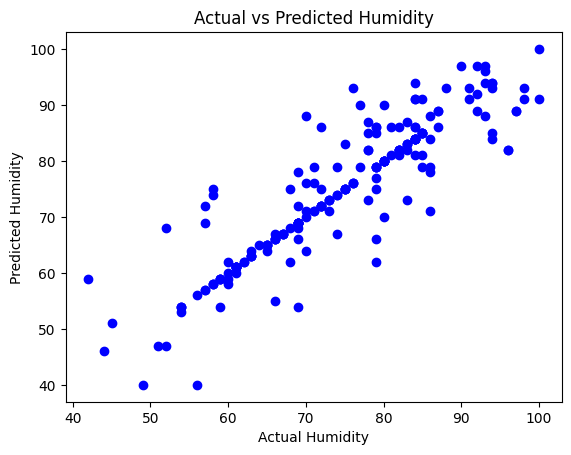

In [62]:
import matplotlib.pyplot as plt

plt.scatter(Y_test, Y_dtr_pred, color='blue')
plt.xlabel("Actual Humidity")
plt.ylabel("Predicted Humidity")
plt.title("Actual vs Predicted Humidity")
plt.show()

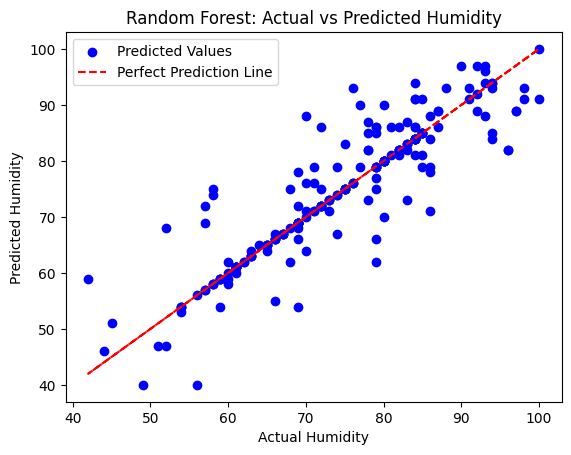

In [80]:
plt.scatter(Y_test, Y_dtr_pred, color='blue', label="Predicted Values")
plt.plot(Y_test, Y_test, color='red', linestyle="--", label="Perfect Prediction Line")
plt.xlabel("Actual Humidity")
plt.ylabel("Predicted Humidity")
plt.title("Random Forest: Actual vs Predicted Humidity")
plt.legend()
plt.show()


In [83]:
accuracy = r2_dtr * 100
print(f"Approximate Accuracy (R²): {accuracy:.2f}%")

Approximate Accuracy (R²): 78.62%


## *Random Forest model*

### Model Training

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [64]:
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [65]:
random_forest_model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

### Prediction

In [69]:
Y_rf_pred = random_forest_model.predict(X_test)

In [70]:
print(Y_rf_pred)

[83.93       85.69       72.43       62.         82.         86.09
 94.69       61.         85.23       83.93       61.04       95.41
 82.98       47.67       81.12       69.68       73.85       84.481
 62.64       65.09       59.         56.         80.         66.04
 90.32       73.         82.98       92.19       87.71666667 66.04
 83.93       81.51       94.43       76.5275     72.         74.89
 62.32       84.         89.24       50.18       68.87       62.64
 73.42       74.16       57.96       91.07       87.53       65.24
 87.48       79.         87.93       80.         67.9        84.85
 95.2315     81.         57.37       74.1        83.01       61.31
 48.37       55.9        73.         51.         83.66       68.91
 91.2        61.14       67.         94.91       61.14       59.36
 74.         62.         71.         75.67       91.428      84.85
 79.67       71.         82.4        83.67       84.34       67.
 73.18       84.85       61.04       65.         81.69       71

### Evaluation

In [72]:
mse_rf = mean_squared_error(Y_test, Y_rf_pred)
r2_rf = r2_score(Y_test, Y_rf_pred)

print("Mean Squared Error:", mse_rf)
print("R-squared Score:", r2_rf)


Mean Squared Error: 18.27523340825321
R-squared Score: 0.8764856689555552


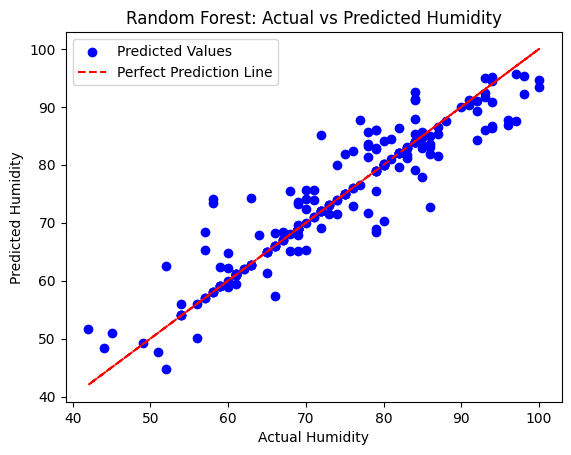

In [79]:
plt.scatter(Y_test, Y_rf_pred, color='blue', label="Predicted Values")
plt.plot(Y_test, Y_test, color='red', linestyle="--", label="Perfect Prediction Line")
plt.xlabel("Actual Humidity")
plt.ylabel("Predicted Humidity")
plt.title("Random Forest: Actual vs Predicted Humidity")
plt.legend()
plt.show()


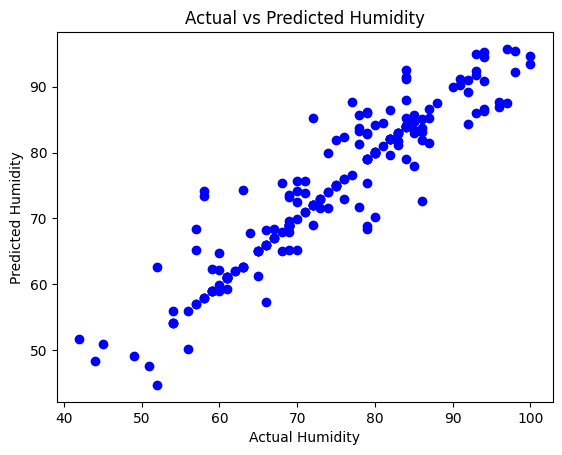

In [78]:
plt.scatter(Y_test, Y_rf_pred, color='blue')
plt.xlabel("Actual Humidity")
plt.ylabel("Predicted Humidity")
plt.title("Actual vs Predicted Humidity")
plt.show()

In [82]:
accuracy = r2_rf * 100
print(f"Approximate Accuracy (R²): {accuracy:.2f}%")


Approximate Accuracy (R²): 87.65%
